## Introduction

We regularly hear in the news and social media that illegal migrants and asylum seekers to the UK are mainly men of fighting age and that most are arriving by small boats across the channel from France. 

This analysis investigates the UK official statistics on migration from the UK Government to identify whether these assertions are indeed true.

#### Source Data

[Irregular Migration Statistics Data](https://www.gov.uk/government/statistical-data-sets/irregular-migration-detailed-dataset-and-summary-tables)

The data is from Quarter 1 from 2018 to Quarter 1 2024 which is the latest available at the time of the analysis.

Notes
1. Data on small boat arrivals relates to any individual who is either (a) detected on arrival to the UK, or (b) detected in the Channel by UK authorities and subsequently brought to the UK, having travelled across the English channel in a small boat.
2. Data on inadequately documented air arrivals relates to recorded detections of individuals who intentionally attempt to arrive in the UK through air routes either without adequate documentation or using fraudulent documentation. This does not include passengers who have genuinely made a mistake, lost their documents, or have arrived inadequately documented for reasons outside of their control. It does not include those who were prevented from boarding at their port of embarkation.
3. Data on recorded detections in the UK relates to recorded detections of individuals outside of the controlled environment of a port, who when encountered are believed by authorities to have evaded border controls to enter the UK irregularly, up to 72 hours before being detected. This includes detections at the ports serviced by the juxtaposed controls (Dover, Cheriton/Longport and St Pancras). 
4. Data on recorded detections at UK ports relates to recorded detections of individuals attempting to enter the UK irregularly at ports. This includes, for example, those detected at ports in lorries, and shipping containers. It does not include detections at ports that are serviced by the juxtaposed controls (Dover, Cheriton/Longport and St Pancras) or those prevented from leaving their port of embarkation en route to the UK, such as those detected at the juxtaposed controls in France and Belgium.


## Import libraries and data

In [963]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

In [964]:
df = pd.read_csv('C:/Users/imoge/Projects/Datasets/UK_irregular_migration.csv',skiprows = 1)

In [965]:
df.shape

(11351, 10)

In [966]:
df.head()

,Year,Quarter,Method of entry,Nationality,Region,Sex,Age Group,Number of detections,Unnamed: 8,Unnamed: 9
0,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,17 and under,14,NaN,NaN
1,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,18 to 24,4,NaN,NaN
2,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,25 to 39,14,NaN,NaN
3,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,40 and over,22,NaN,NaN
4,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Male,17 and under,21,NaN,NaN


In [967]:
df.tail()

,Year,Quarter,Method of entry,Nationality,Region,Sex,Age Group,Number of detections,Unnamed: 8,Unnamed: 9
11346,2024,2024 Q1,Small boat arrivals,Yemen,Middle East,Female,25 to 39,1,NaN,NaN
11347,2024,2024 Q1,Small boat arrivals,Yemen,Middle East,Male,18 to 24,4,NaN,NaN
11348,2024,2024 Q1,Small boat arrivals,Yemen,Middle East,Male,25 to 39,17,NaN,NaN
11349,2024,2024 Q1,Small boat arrivals,Yemen,Middle East,Male,40 and over,2,NaN,NaN
11350,End of table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [968]:
# Drop final row not wanted
df = df.iloc[0:-1,:]

In [969]:
# Drop empty columns
df.drop(columns = ['Unnamed: 8','Unnamed: 9'],axis = 1, inplace = True)

In [970]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350 entries, 0 to 11349
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  11350 non-null  object
 1   Quarter               11350 non-null  object
 2   Method of entry       11350 non-null  object
 3   Nationality           11350 non-null  object
 4   Region                11350 non-null  object
 5   Sex                   11350 non-null  object
 6   Age Group             11350 non-null  object
 7   Number of detections  11350 non-null  object
dtypes: object(8)
memory usage: 709.5+ KB


There are some features that we need to convert to different datatypes for analysis

In [971]:
# Confirm nulls
df.isnull().sum()

Year                    0
Quarter                 0
Method of entry         0
Nationality             0
Region                  0
Sex                     0
Age Group               0
Number of detections    0
dtype: int64

There are no null values

In [972]:
print(df['Year'].unique())

['2018' '2019' '2020' '2021' '2022' '2023' '2024']


We have data from 2018 to 2024

In [973]:
print(df['Quarter'].unique())

['2018 Q1' '2018 Q2' '2018 Q3' '2018 Q4' '2019 Q1' '2019 Q2' '2019 Q3'
 '2019 Q4' '2020 Q1' '2020 Q2' '2020 Q3' '2020 Q4' '2021 Q1' '2021 Q2'
 '2021 Q3' '2021 Q4' '2022 Q1' '2022 Q2' '2022 Q3' '2022 Q4' '2023 Q1'
 '2023 Q2' '2023 Q3' '2023 Q4' '2024 Q1']


The data is from first quarter of 2018 to first quarter of 2024. We will discount the first quarter of 2024 so that we have six full years of data. 

In [974]:
df = df[df['Year']!='2024']

In [975]:
print(df['Method of entry'].unique())

['Inadequately documented air arrivals' 'Recorded detections at UK ports'
 'Recorded detections in the UK' 'Small boat arrivals']


There are four categories of irregular arrivals

In [976]:
print(df['Nationality'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Brazil'
 'British overseas citizens' 'Burundi' 'Cameroon' 'Canada' 'Chad' 'Chile'
 'China' 'Colombia' 'Congo' 'Congo (Democratic Republic)'
 'Dominican Republic' 'Egypt' 'Eritrea' 'Ethiopia' 'Gambia, The' 'Georgia'
 'Ghana' 'Greece' 'Guinea-Bissau' 'India' 'Iran' 'Iraq' 'Italy' 'Kuwait'
 'Latvia' 'Lebanon' 'Moldova' 'Nepal' 'Netherlands' 'Nigeria'
 'North Macedonia' 'Occupied Palestinian Territories' 'Other and unknown'
 'Pakistan' 'Poland' 'Russia' 'Sierra Leone' 'Slovenia' 'Somalia'
 'South Africa' 'South Korea' 'Sri Lanka' 'Stateless' 'Sudan' 'Syria'
 'Taiwan' 'Tanzania' 'Turkey' 'Ukraine' 'United States' 'Vietnam' 'Yemen'
 'Libya' 'Morocco' 'Guinea' 'Ivory Coast' 'Kyrgyzstan' 'Liberia'
 'South Sudan' 'Spain' 'Uganda' 'Argentina' 'Bangladesh'
 'Bosnia and Herzegovina' 'Denmark' 'France' 'Israel' 'Jamaica' 'Kenya'
 'Kosovo' 'Lithuania' 'Mali' 'Mexico' 'Portugal' 'Refugee' 'Romania'
 'Senegal' 'Thailand' 'Trinidad and Tobago' 'Tunisia' 'Zam

In [977]:
print(df['Region'].unique())

['Asia Central' 'Europe Other' 'Africa North' 'Africa Sub-Saharan'
 'America Central and South' 'Other' 'America North' 'Asia East' 'EU 14'
 'Asia South' 'Middle East' 'EU 8' 'Asia South East' 'EU 2' 'EU Other'
 'Oceania' 'Not currently recorded']


People are from many countries and regions around the world

In [978]:
print(df['Sex'].unique())

['Female' 'Male' 'Unknown' 'Not currently recorded']


In [979]:
print(df['Age Group'].unique())

['17 and under' '18 to 24' '25 to 39' '40 and over' 'Unknown'
 'Not currently recorded']


In [980]:
df['Number of detections']

0        14
1         4
2        14
3        22
4        21
         ..
10811     1
10812     1
10813     1
10814    11
10815     2
Name: Number of detections, Length: 10816, dtype: object

In [981]:
df['Number of detections'].unique()

array(['14', '4', '22', '21', '8', '20', '18', '3', '12', '5', '25', '37',
       '7', '1', '2', '11', '6', '28', '15', '9', '71', '85', '31', '16',
       '10', '47', '24', '17', '19', '30', '13', '50', '55', '38', '23',
       '57', '91', '112', '162', '60', '59', '96', '27', '35', '58', '29',
       '99', '51', '34', '105', '98', '123', '33', '87', '69', '78',
       '122', '79', '36', '42', '43', '119', '41', '32', '165', '125',
       '116', '107', '54', '92', '120', '146', '188', '113', '75', '110',
       '46', '210', '74', '82', '102', '88', '127', '171', '45', '142',
       '267', '249', '72', '157', '26', '97', '137', '182', '128', '214',
       '233', '64', '66', '40', '63', '70', '73', '106', '160', '205',
       '126', '115', '173', '68', '61', '117', '83', '129', '143', '130',
       '84', '39', '304', '44', '48', '161', '238', '224', '53', '202',
       '198', '80', '52', '89', '49', '136', '100', '144', '338', '62',
       '104', '153', '81', '560', '134', '264', '56', 

We have some values with commas for thousands that we need to strip out

In [982]:
# Strip out commas and set to integer
df['Number of detections'] = (df['Number of detections'].str.replace(',', '', regex=True).astype(int))

## Arrivals by Year

In [983]:
# Get arrivals by year and look at unique values
arr_year = df[['Year','Number of detections']]

In [984]:
# Remove commas and set to int type
arr_year.columns = ['Year','Number']
arr_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10816 entries, 0 to 10815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    10816 non-null  object
 1   Number  10816 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 211.2+ KB


In [985]:
# Get arrivals by year
sum_arrivals = arr_year.groupby(['Year'],as_index = False).sum()

In [986]:
sum_arrivals['Number'].mean()

29162.833333333332

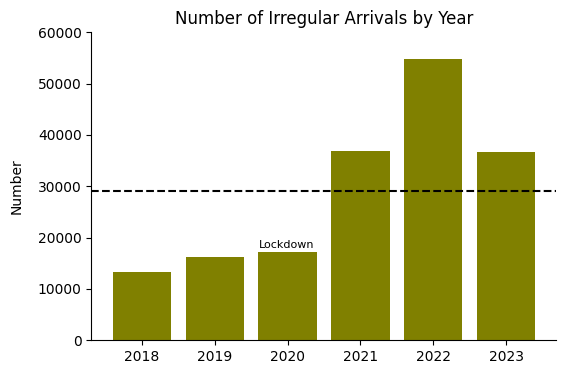

In [987]:
# Plot Arrivals by Year
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(x = sum_arrivals.Year, height = sum_arrivals.Number,color = 'olive')
plt.title("Number of Irregular Arrivals by Year",fontsize = 12)
plt.text(1.6,18000,'Lockdown', fontsize = 8)
plt.ylabel('Number',labelpad = 10)
plt.axhline(y=sum_arrivals['Number'].mean(), color='k', linestyle='--')
plt.ylim(0,60000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

* The trend is generally upwards over the period
* The jump up in 2021 and into 2022 follows a period of lockdown for Covid 19 in 2020
* The numbers fall back in 2023 but still higher than prior to covid and above the mean value as the dotted line

In [988]:
df.head()

,Year,Quarter,Method of entry,Nationality,Region,Sex,Age Group,Number of detections
0,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,17 and under,14
1,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,18 to 24,4
2,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,25 to 39,14
3,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Female,40 and over,22
4,2018,2018 Q1,Inadequately documented air arrivals,Afghanistan,Asia Central,Male,17 and under,21


## Arrivals by Method of Entry

In [989]:
# Get arrivals by method
sum_method = df.groupby(['Method of entry'],as_index = False)['Number of detections'].sum()
sum_method.columns = ['Method','Number']
sum_method

,Method,Number
0,Inadequately documented air arrivals,23847
1,Recorded detections at UK ports,4158
2,Recorded detections in the UK,32627
3,Small boat arrivals,114345


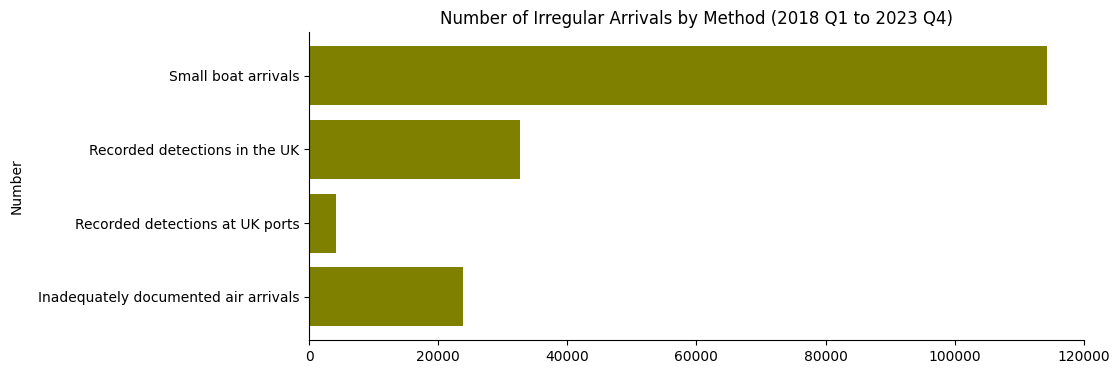

In [990]:
# Plot Arrivals by Year
fig, ax = plt.subplots(figsize = (10,4))
plt.barh(sum_method.Method, sum_method.Number,color = 'olive')
plt.title("Number of Irregular Arrivals by Method (2018 Q1 to 2023 Q4)",fontsize = 12)
#plt.text(5.6,9000,'Q1 Only', fontsize = 8)
#plt.text(1.6,18000,'Lockdown', fontsize = 8)
plt.ylabel('Number',labelpad = 10)
#plt.ylim(0,60000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

Most irregular arrivals are by small boats

## Arrivals by Method by Year

In [991]:
# Get arrivals by method and number of detections and convert to pivot table
arr_meth_year = df.groupby(['Year','Method of entry'],as_index = False)['Number of detections'].sum()

''

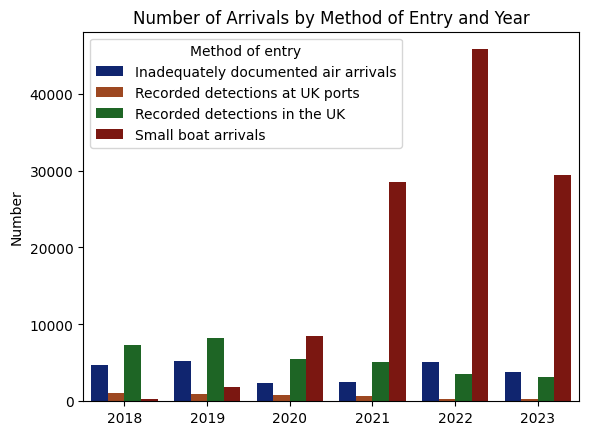

In [993]:
# Plot the arrivals by method and year
g = sns.barplot(data = arr_meth_year ,
                x='Year', 
                y='Number of detections', 
                hue='Method of entry',
                palette = 'dark')
plt.title("Number of Arrivals by Method of Entry and Year")
plt.ylabel("Number")
plt.xlabel("")
;

We can see that detections at ports and in the UK have trended downwards, air arrivals have fluctuated over the period but the largest category of small boat arrivals is the largest element and peaked in 2022 

## Analysis by Quarter

In [460]:
df['Quarter'].head()

0    2018 Q1
1    2018 Q1
2    2018 Q1
3    2018 Q1
4    2018 Q1
Name: Quarter, dtype: object

We would like to split off the quarter from the year and then just groupby quarter

In [461]:
# Select the columns we want, strip off the Q1 etc and groupby this new column
quarter = df[['Quarter','Number of detections']]
quarter['Q'] = quarter['Quarter'].str[-2:]
quarter_grouped = quarter.groupby('Q',as_index =False)['Number of detections'].sum()
quarter_grouped

,Q,Number of detections
0,Q1,25127
1,Q2,34432
2,Q3,65622
3,Q4,49796


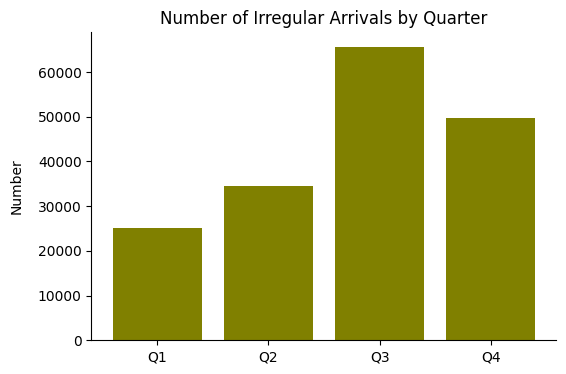

In [462]:
# Plot Arrivals by Quarter
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(x = quarter_grouped.Q, height = quarter_grouped['Number of detections'],color = 'olive')
plt.title("Number of Irregular Arrivals by Quarter",fontsize = 12)
plt.ylabel('Number',labelpad = 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);


Quarter 3 which is July to September has the highest numbers, likely as this is the summer period and the weather is better for the small boats to make the crossing

## What age group are they?

In [463]:
df['Age Group'].unique()

array(['17 and under', '18 to 24', '25 to 39', '40 and over', 'Unknown',
       'Not currently recorded'], dtype=object)

In [465]:
# Replace these values
df['Age Group'].replace({'Not currently recorded':'Not available','Unknown':'Not available'},inplace = True)

The age categories are as we might expect but there are also some that are not recorded and some that are unknown. It is not clear what the difference is between these but we will combine these into one category of 'not available'.

In [486]:
# Create dataframe of number of detections by age group
age_sum = df.groupby(['Age Group'],as_index = False)['Number of detections'].sum()
age_sum

,Age Group,Number of detections
0,17 and under,32305
1,18 to 24,53843
2,25 to 39,71836
3,40 and over,14342
4,Not available,2651


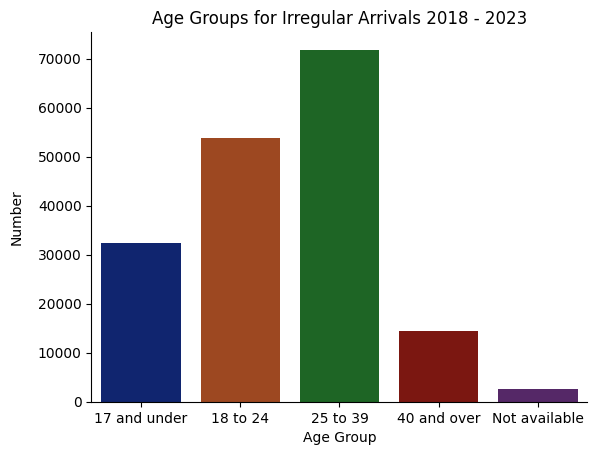

In [487]:
# Plot the age data
ax = sns.barplot(data = age_sum, 
                 x = 'Age Group',
                 y = 'Number of detections',
                 errorbar = None,
                 palette = 'dark')
plt.title("Age Groups for Irregular Arrivals 2018 - 2023")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("Number", labelpad = 10);

As commonly noted in the press, the main age group is 25 to 39. We can investigate if this has changed over the six year period by adding in year to the plot.

In [569]:
# Create dataframe number of detections by year and age groupo
age_year = df.groupby(['Year','Age Group'], as_index = False)['Number of detections'].sum()
age_year.head()

,Year,Age Group,Number of detections
0,2018,17 and under,2991
1,2018,18 to 24,3598
2,2018,25 to 39,5592
3,2018,40 and over,1193
4,2018,Not available,3


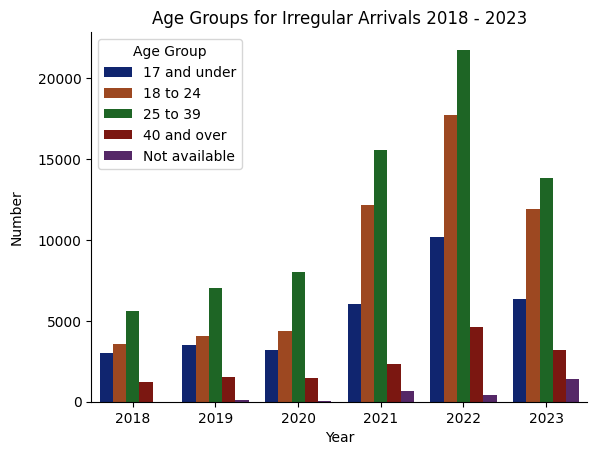

In [568]:
# Plot the arrivals by age group per year
ax = sns.barplot(data = age_year,
                 x ='Year',
                 y = 'Number of detections',
                 hue = 'Age Group',
                 errorbar = None,
                 palette = 'dark')
plt.title("Age Groups for Irregular Arrivals 2018 - 2023")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("Number", labelpad = 10);

We can see that the largest age group remains 25 to 39 over the period

In [572]:
# Create a crosstab table for the values we want
age_cross = pd.crosstab(index = age_year['Year'], columns = age_year['Age Group'], values = age_year['Number of detections'],aggfunc = 'sum',normalize = 'index')
age_cross = (age_cross*100).reset_index()
age_cross

Age Group,Year,17 and under,18 to 24,25 to 39,40 and over,Not available
0,2018,22.359273,26.896913,41.803095,8.918293,0.022427
1,2019,21.436030,24.967754,43.387998,9.532584,0.675634
2,2020,18.836257,25.438596,46.836257,8.491228,0.397661
3,2021,16.483308,33.097004,42.302991,6.367316,1.749382
4,2022,18.662937,32.402837,39.808417,8.403715,0.722094
5,2023,17.235179,32.478749,37.658021,8.729294,3.898758


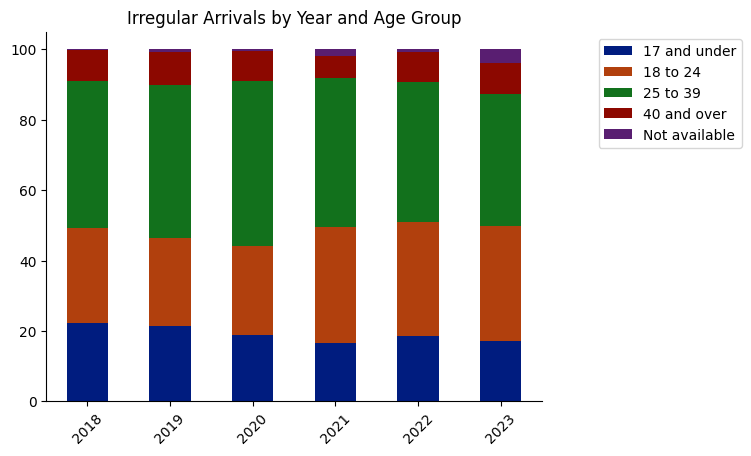

In [898]:
# Plot the crosstablulated data
sns.set_palette("dark")
ax = age_cross.plot( 
    x = 'Year',
    kind = 'bar', 
    stacked = True, 
    title = 'Irregular Arrivals by Year and Age Group', 
    mark_right = True
    ) 

plt.xticks(rotation=45)
plt.xlabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(1.1, 1));

* We can see that the category for age unavailable has increased as a proportion over the period
* The category for 25 to 39 has decreased as a proportion of the total compared to the 18 to 24 age group.

## What sex are the arrivals?

In [877]:
sex = df.groupby(['Sex'],as_index = False)['Number of detections'].sum()
sex['%'] = round(sex['Number of detections']/(sex['Number of detections'].sum())*100,2)
sex

,Sex,Number of detections,%
0,Female,25326,14.47
1,Male,147177,84.11
2,Not currently recorded,1838,1.05
3,Unknown,636,0.36


Irregular arrivals are predominantly male

''

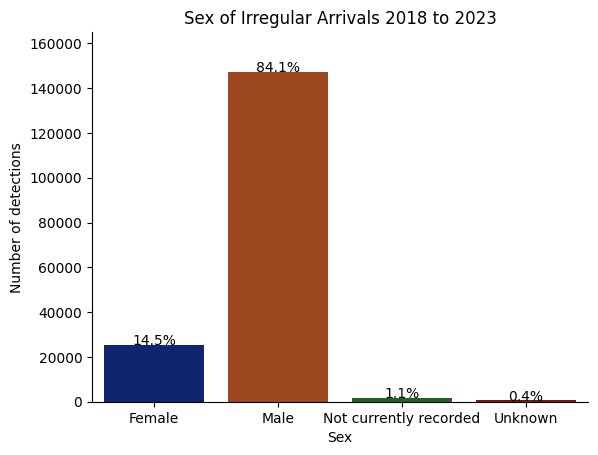

In [899]:
sns.set_palette("dark")
ax = sns.barplot(data = sex, x = 'Sex', y = 'Number of detections')
plt.title('Sex of Irregular Arrivals 2018 to 2023')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0,165000)
for index, row in sex.iterrows():
    plt.text(index, row['Number of detections'], f"{row['%']:.1f}%", 
             color='black', ha="center")
;

In [580]:
# Create dataframe number of detections by year and age groupo
sex_year = df.groupby(['Year','Sex'], as_index = False)['Number of detections'].sum()
sex_year.head()

,Year,Sex,Number of detections
0,2018,Female,2704
1,2018,Male,10634
2,2018,Unknown,39
3,2019,Female,3023
4,2019,Male,13196


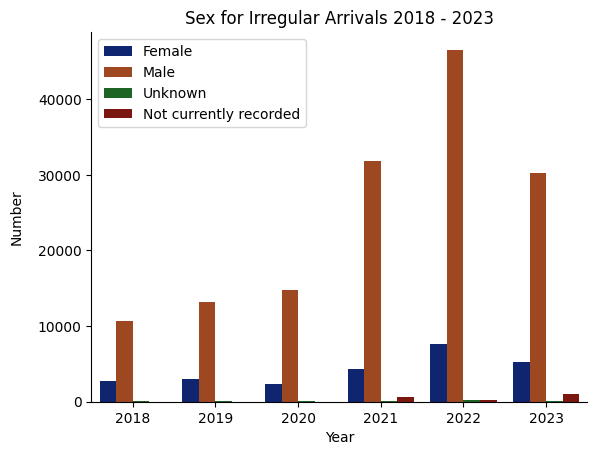

In [583]:
# Plot the arrivals by sex per year
ax = sns.barplot(data = sex_year,
                 x ='Year',
                 y = 'Number of detections',
                 hue = 'Sex',
                 errorbar = None,
                 palette = 'dark')
plt.title("Sex for Irregular Arrivals 2018 - 2023")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("Number", labelpad = 10)
ax.legend(loc = 'upper left');

In [584]:
# Create a crosstab table for the values we want
sex_cross = pd.crosstab(index = sex_year['Year'], columns = sex_year['Sex'], values = sex_year['Number of detections'],aggfunc = 'sum',normalize = 'index')
sex_cross = (sex_cross*100).reset_index()
sex_cross

Sex,Year,Female,Male,Not currently recorded,Unknown
0,2018,20.213800,79.494655,0.000000,0.291545
1,2019,18.567656,81.051532,0.000000,0.380812
2,2020,13.789474,86.017544,0.000000,0.192982
3,2021,11.593730,86.472170,1.580963,0.353136
4,2022,14.025081,85.091953,0.365617,0.517349
5,2023,14.442568,82.437881,2.877071,0.242480


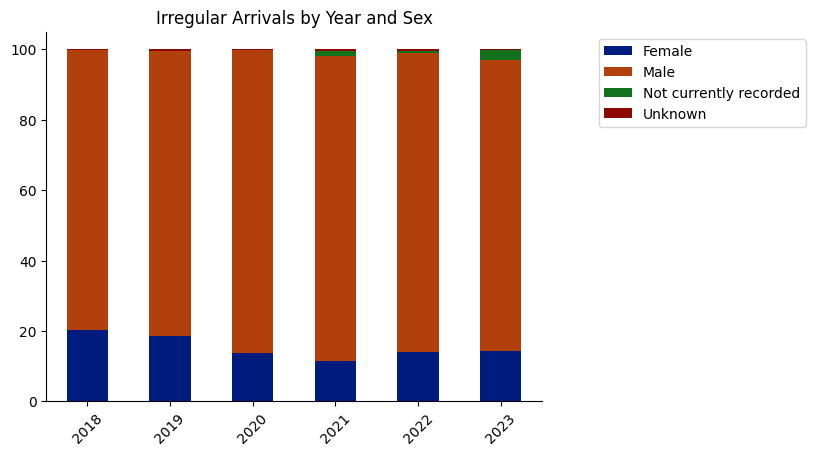

In [900]:
# Plot the crosstablulated data
sns.set_palette("dark")

ax = sex_cross.plot( 
    x = 'Year',
    kind = 'bar', 
    stacked = True, 
    title = 'Irregular Arrivals by Year and Sex', 
    mark_right = True,
    ) 

plt.xticks(rotation=45)
plt.xlabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(1.1, 1));

We can see that the proportion of females being recorded initially fell from 2018 but increased again from 2022

## Where do they come from?

In [587]:
df['Region'].unique()

array(['Asia Central', 'Europe Other', 'Africa North',
       'Africa Sub-Saharan', 'America Central and South', 'Other',
       'America North', 'Asia East', 'EU 14', 'Asia South', 'Middle East',
       'EU 8', 'Asia South East', 'EU 2', 'EU Other', 'Oceania',
       'Not currently recorded'], dtype=object)

We have a number of regions where the irregular arrivals come from. We can look at the countries contained within these to get more of an idea

In [599]:
# Function to display each region
def nation(reg):
    result = df[df['Region']==reg]['Nationality'].value_counts().to_frame()
    print('Region: ',i)
    display(result)

In [600]:
# run the function for each region in the unique list
for i in list(df['Region'].unique()):
    nation(i)

Region:  Asia Central


,Nationality
Afghanistan,577
Tajikistan,17
Kazakhstan,16
Kyrgyzstan,14
Uzbekistan,4
Turkmenistan,1


Region:  Europe Other


,Nationality
Albania,588
Turkey,310
Georgia,209
Ukraine,106
Russia,100
Azerbaijan,43
Kosovo,28
Cyprus (Northern part of),20
Moldova,15
Belarus,9


Region:  Africa North


,Nationality
Sudan,461
Libya,224
Algeria,201
Morocco,198
Egypt,180
Tunisia,80
Mauritania,15
Western Sahara,8


Region:  Africa Sub-Saharan


,Nationality
Eritrea,545
Ethiopia,312
Somalia,273
Chad,172
Nigeria,162
Guinea,93
"Gambia, The",90
South Sudan,82
Ghana,79
Congo (Democratic Republic),64


Region:  America Central and South


,Nationality
Brazil,64
Mexico,12
Colombia,11
Dominican Republic,10
Dominica,9
Peru,8
Argentina,7
Jamaica,5
Costa Rica,4
Venezuela,4


Region:  Other


,Nationality
Stateless,320
Other and unknown,185
Refugee,80
British overseas citizens,19
Pitcairn Islands (British),1
South Georgia and the South Sandwich Islands (British),1


Region:  America North


,Nationality
United States,25
Canada,3
Greenland,2


Region:  Asia East


,Nationality
China,121
Taiwan,4
Hong Kong,3
Japan,3
South Korea,2
Mongolia,1


Region:  EU 14


,Nationality
Italy,32
Spain,24
France,23
Portugal,15
Germany,13
Denmark,10
Greece,7
Netherlands,6
Belgium,4
Sweden,4


Region:  Asia South


,Nationality
India,281
Pakistan,215
Sri Lanka,204
Bangladesh,77
Nepal,26
Bhutan,1


Region:  Middle East


,Nationality
Iran,682
Iraq,624
Syria,494
Kuwait,317
Yemen,195
Occupied Palestinian Territories,167
Lebanon,64
Jordan,34
Saudi Arabia,21
Israel,14


Region:  EU 8


,Nationality
Poland,19
Lithuania,10
Hungary,9
Latvia,6
Czechia,5
Slovakia,5
Slovenia,2


Region:  Asia South East


,Nationality
Vietnam,294
Philippines,10
Myanmar (Burma),9
Thailand,5
Singapore,2
Malaysia,2
Indonesia,2
Cambodia,1
East Timor,1
Laos,1


Region:  EU 2


,Nationality
Romania,40
Bulgaria,10


Region:  EU Other


,Nationality
Malta,2
Croatia,1
Cyprus,1


Region:  Oceania


,Nationality
American Samoa (United States),2
Australia,1
Fiji,1
Marshall Islands,1


Region:  Not currently recorded


,Nationality
Not currently recorded,11


#### Category Analysis

* EU2 - Romania and Bulgaria
* EU14 - Italy, Spain, France, Portugal, Germany, Denmark, Greece, Netherlands, Belgium, Sweden, Ireland, Finland, Austria
* EU8 - Poland, Lithuania, Hungary, Latvia, Czechia, Slovakia, Slovenia
* Europe Other - Albania, Turkey, Georgia, Ukraine, Russia, Azerbaijan, Kosovo, Cyprus(North), Moldova, Belarus, North Macedonia, Norway, Servia, Bosnia and Herzegovina, Andorra, Montenegro, Armenia, Iceland
* Other - Stateless, Other and Unknown, Refugee, British Overseas Citizens, Pitcairn Islands, South Georgia and South Sandwich Islands

In [604]:
# Groupby region and sort in descending order
df.groupby('Region',as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections', ascending = False)

,Region,Number of detections
13,Middle East,72201
12,Europe Other,29070
1,Africa Sub-Saharan,21035
4,Asia Central,20160
0,Africa North,16052
6,Asia South,6166
7,Asia South East,4161
16,Other,2845
14,Not currently recorded,1838
5,Asia East,917


* We can see that most come from the Middle East
* We can probably clean up the data a little so we can visualise it better
* EU14, EU2, EU8 and EU Other into one category

In [608]:
df_copy = df.copy()

df_copy['Region'].replace({'EU 14':'EU','EU 2':'EU','EU 8':'EU','EU Other':'EU'}, inplace = True)

In [609]:
df_copy.groupby('Region',as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections', ascending = False)

,Region,Number of detections
10,Middle East,72201
9,Europe Other,29070
1,Africa Sub-Saharan,21035
4,Asia Central,20160
0,Africa North,16052
6,Asia South,6166
7,Asia South East,4161
13,Other,2845
11,Not currently recorded,1838
5,Asia East,917


In [615]:
# Drop those not currently recorded
df_copy = df_copy[df_copy['Region']!='Not currently recorded']

In [625]:
df_region = df_copy.groupby(['Region'], as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections',ascending = False)
df_region.head()

,Region,Number of detections
10,Middle East,72201
9,Europe Other,29070
1,Africa Sub-Saharan,21035
4,Asia Central,20160
0,Africa North,16052


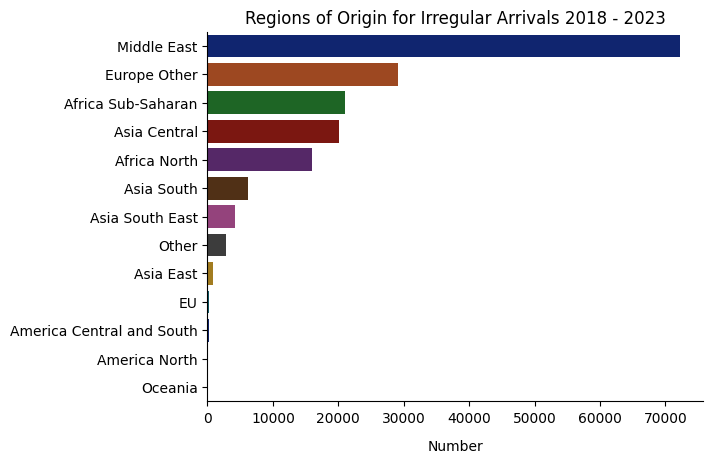

In [626]:
# Plot the age data
ax = sns.barplot(data = df_region, 
                 y = 'Region',
                 x = 'Number of detections',
                 errorbar = None,
                 palette = 'dark')
plt.title("Regions of Origin for Irregular Arrivals 2018 - 2023")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("")
plt.xlabel("Number", labelpad = 10);

The Middle East is by far and away the source of the largest number of irregular arrivals. We can see if this has changed in pattern over the years or if this has been the main source for the whole six year period.

In [630]:
# Groupby region and year
region_year = df_copy.groupby(['Year','Region'], as_index = False)['Number of detections'].sum()
region_year

,Year,Region,Number of detections
0,2018,Africa North,1484
1,2018,Africa Sub-Saharan,2290
2,2018,America Central and South,31
3,2018,America North,15
4,2018,Asia Central,741
...,...,...,...
69,2023,EU,62
70,2023,Europe Other,5684
71,2023,Middle East,11295
72,2023,Oceania,2


In [657]:
# Create a crosstab table for the values we want
region_cross = pd.crosstab(index = region_year['Year'], columns = region_year['Region'], values = region_year['Number of detections'],aggfunc = 'sum')
region_cross = region_cross.reset_index()
region_cross

Region,Year,Africa North,Africa Sub-Saharan,America Central and South,America North,Asia Central,Asia East,Asia South,Asia South East,EU,Europe Other,Middle East,Oceania,Other
0,2018,1484.0,2290.0,31.0,15.0,741.0,388.0,342.0,196.0,45.0,1402.0,6238.0,NaN,205.0
1,2019,1376.0,2014.0,45.0,5.0,845.0,283.0,503.0,274.0,48.0,1603.0,8813.0,NaN,472.0
2,2020,2240.0,2814.0,43.0,NaN,910.0,14.0,472.0,199.0,24.0,1421.0,8201.0,1.0,761.0
3,2021,2953.0,5599.0,23.0,4.0,1950.0,12.0,696.0,1445.0,47.0,2717.0,20093.0,NaN,692.0
4,2022,4303.0,3960.0,34.0,5.0,9508.0,20.0,1858.0,566.0,57.0,16243.0,17561.0,2.0,385.0
5,2023,3696.0,4358.0,35.0,4.0,6206.0,200.0,2295.0,1481.0,62.0,5684.0,11295.0,2.0,330.0


''

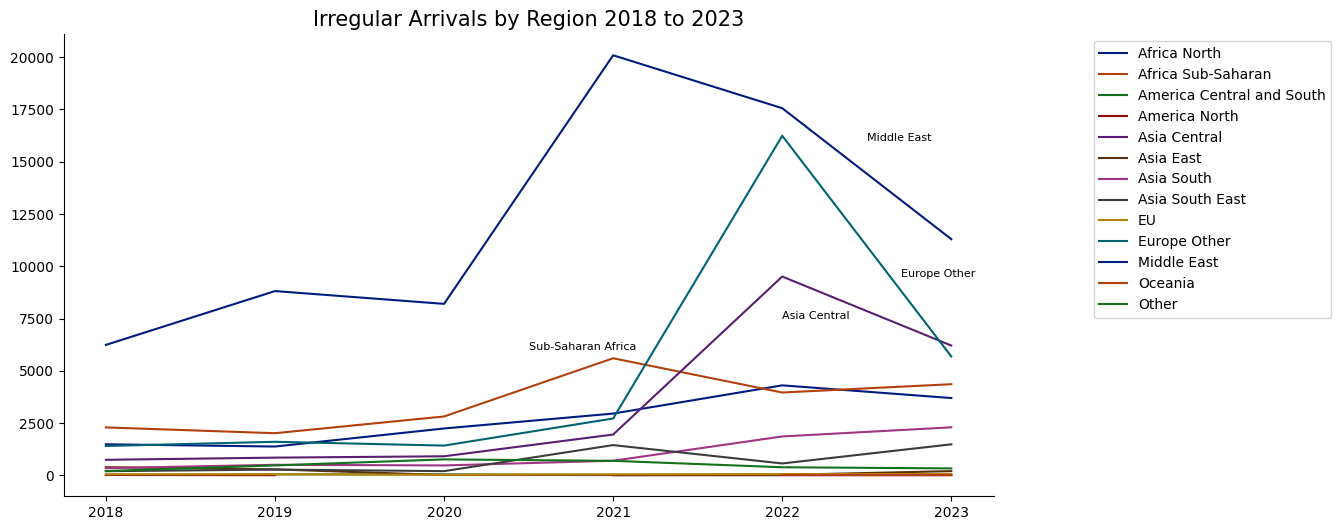

In [901]:
# Plot a line chart
sns.set_palette("dark")
fig, ax = plt.subplots(figsize = (12,6))
region_cross.set_index('Year').plot(ax = ax)
ax.legend(bbox_to_anchor=(1.1, 1))
plt.title('Irregular Arrivals by Region 2018 to 2023', fontsize = 15)
plt.text(4.5,16000,'Middle East', fontsize = 8)
plt.text(4.7,9500,'Europe Other', fontsize = 8)
plt.text(4.0,7500,'Asia Central', fontsize = 8)
plt.text(2.5,6000,'Sub-Saharan Africa', fontsize = 8)
plt.xlabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
;

* The chart clearly shows the peaks in 2022 amongst the biggest source regions
* Europe Other region includes Ukraine, where we might expect larger numbers of people to originate from due to the war
* Since then the numbers have been falling but remain higher than the period prior to the Covid lockdown
* We can look at the proportions of the top five regions over the period

In [696]:
df_copy['Region'].unique()

array(['Asia Central', 'Europe Other', 'Africa North',
       'Africa Sub-Saharan', 'America Central and South', 'Other',
       'America North', 'Asia East', 'EU', 'Asia South', 'Middle East',
       'Asia South East', 'Oceania'], dtype=object)

In [707]:
# Filter for top 5 regions
regions = ['Middle East','Europe Other', 'Asia Central', 'Africa Sub-Saharan', 'Africa North']
top5 = df_copy[df_copy['Region'].isin(regions)]

# Groupby year
top5_year = top5.groupby(['Year','Region'], as_index = False)['Number of detections'].sum()

# Create a crosstab table for the values we want
top5_cross = pd.crosstab(index = top5_year['Year'], 
                         columns = top5_year['Region'], 
                         values = top5_year['Number of detections'],
                         aggfunc = 'sum',
                         )
top5_cross

Region,Africa North,Africa Sub-Saharan,Asia Central,Europe Other,Middle East
Year,,,,,
2018,1484,2290,741,1402,6238
2019,1376,2014,845,1603,8813
2020,2240,2814,910,1421,8201
2021,2953,5599,1950,2717,20093
2022,4303,3960,9508,16243,17561
2023,3696,4358,6206,5684,11295


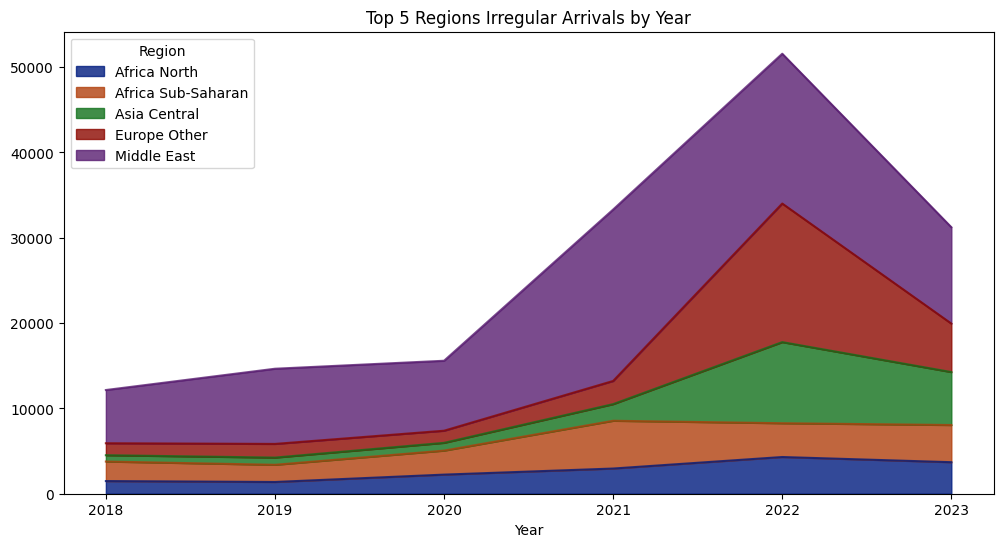

In [903]:
# Plot an area chart
sns.set_palette("dark")
fig, ax = plt.subplots(figsize = (12,6))
top5_cross.plot.area(ax = ax, alpha = 0.8)
plt.title("Top 5 Regions Irregular Arrivals by Year");

In [703]:
# Create a percent crosstab table for the values we want
top5_cross_percent = pd.crosstab(index = top5_year['Year'], 
                         columns = top5_year['Region'], 
                         values = top5_year['Number of detections'],
                         normalize = 'index',
                         aggfunc = 'sum'
                         )
top5_cross_percent = (top5_cross_percent*100).reset_index()
top5_cross_percent

Region,Year,Africa North,Africa Sub-Saharan,Asia Central,Europe Other,Middle East
0,2018,12.208968,18.839984,6.096257,11.534348,51.320444
1,2019,9.391850,13.746502,5.767524,10.941233,60.152891
2,2020,14.371872,18.054664,5.838573,9.117156,52.617734
3,2021,8.864673,16.807757,5.853746,8.156220,60.317603
4,2022,8.343190,7.678139,18.435288,31.493941,34.049443
5,2023,11.831365,13.950511,19.866193,18.195205,36.156727


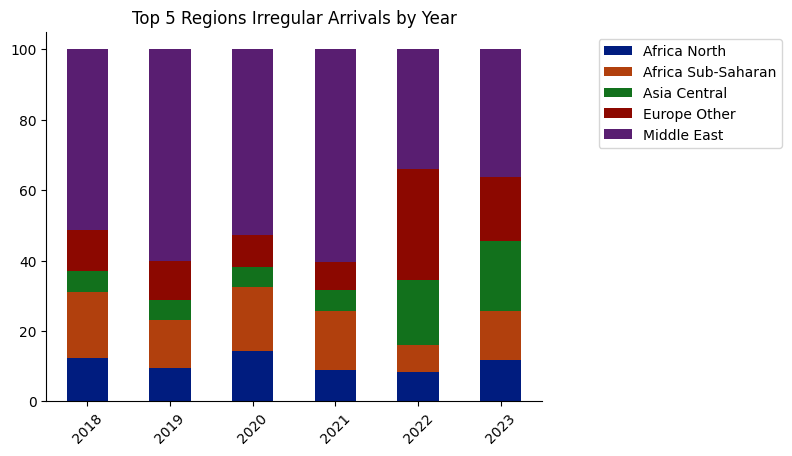

In [904]:
# Plot the crosstablulated data as percentage stacked bar
sns.set_palette("dark")
ax = top5_cross_percent.plot( 
    x = 'Year',
    kind = 'bar', 
    stacked = True, 
    title = 'Top 5 Regions Irregular Arrivals by Year', 
    mark_right = True,
    ) 

plt.xticks(rotation=45)
plt.xlabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(1.1, 1));

The area chart and stacked bar show the proportions by each of the top 5 regions over the period. The stacked chart is a bit more clear and shows how the proportion from the Middle East increased in 2021 relative to the other regions and then dropped back in 2022 and 2023, with Europe Other increasing significantly in 2022, with increases also from Asia Central the 'stans'.

## Analysis by Country

We will continue to look at the top 5 regions in the rest of this analysis

In [711]:
regions

['Middle East',
 'Europe Other',
 'Asia Central',
 'Africa Sub-Saharan',
 'Africa North']

In [752]:
# Create separate dataframes

middle = df_copy[df_copy['Region']=='Middle East'].groupby('Nationality',as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections',ascending = False).head()
europe_other = df_copy[df_copy['Region']=='Europe Other'].groupby('Nationality',as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections',ascending = False).head()
asia_cent = df_copy[df_copy['Region']=='Asia Central'].groupby('Nationality',as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections',ascending = False).head()
africa_sub = df_copy[df_copy['Region']=='Africa Sub-Saharan'].groupby('Nationality',as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections',ascending = False).head()
africa_north = df_copy[df_copy['Region']=='Africa North'].groupby('Nationality',as_index = False)['Number of detections'].sum().sort_values(by = 'Number of detections',ascending = False).head()


In [767]:
africa_north

,Nationality,Number of detections
5,Sudan,11130
1,Egypt,2642
2,Libya,879
0,Algeria,738
4,Morocco,465


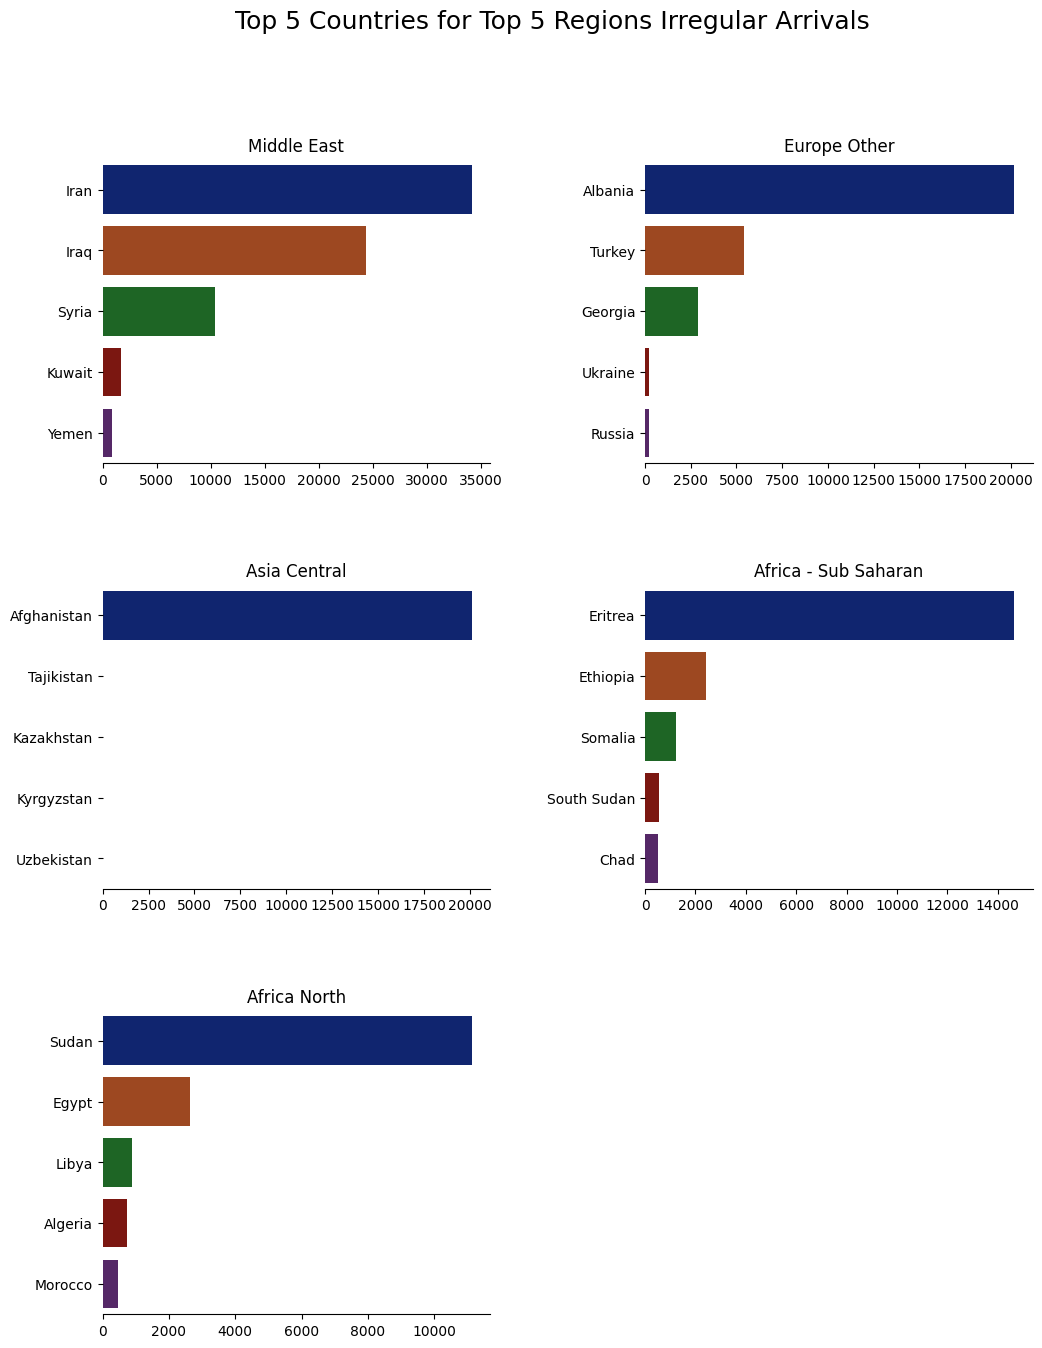

In [782]:
# Plot the countries and regions
fig, axs = plt.subplots(3,2, figsize = (12,15))
fig.delaxes(axs[2,1]) 

fig.suptitle("Top 5 Countries for Top 5 Regions Irregular Arrivals", fontsize=18)
plt.subplots_adjust(wspace=0.4,hspace = 0.4)

x = 'Number of detections'

# Plot barplots
a = sns.barplot(y=middle.Nationality, x=x, data=middle, ax = axs[0,0],palette = 'dark')
b = sns.barplot(y=europe_other.Nationality, x=x, data=europe_other, ax = axs[0,1],palette = 'dark')
c = sns.barplot(y=asia_cent.Nationality, x=x, data=asia_cent, ax = axs[1,0],palette = 'dark')
d = sns.barplot(y=africa_sub.Nationality, x=x, data=africa_sub, ax = axs[1,1],palette = 'dark')
e = sns.barplot(y=africa_north.Nationality, x=x, data=africa_north, ax = axs[2,0],palette = 'dark')

plots = [a,b,c,d,e]

# Cycle over the plots and remove axis labels and set facecolour
for p in plots:
    p.set(xlabel = None)
    p.set(ylabel = None)
    p.set_facecolor('white')
            
# Add titles to the plots
axs[0,0].set_title("Middle East", fontsize = 12) 
axs[0,1].set_title("Europe Other", fontsize = 12) 
axs[1,0].set_title("Asia Central", fontsize = 12) 
axs[1,1].set_title("Africa - Sub Saharan", fontsize = 12) 
axs[2,0].set_title("Africa North", fontsize = 12)

# Remove frames
list_frames = [axs[0,0],axs[0,1],axs[1,0],axs[1,1],axs[2,0]]
for l in list_frames:
    l.spines['top'].set_visible(False)
    l.spines['right'].set_visible(False)
    l.spines['left'].set_visible(False)
        
   

In [793]:
# Get the top countries by number of arrivals
all_countries = df_copy.groupby('Nationality',as_index = False)['Number of detections'].sum()
all_countries['Average'] = all_countries['Number of detections']/6
all_countries.sort_values(by = 'Average',ascending = False).round(0)

,Nationality,Number of detections,Average
77,Iran,34152,5692.0
78,Iraq,24372,4062.0
1,Albania,20189,3365.0
0,Afghanistan,20090,3348.0
52,Eritrea,14650,2442.0
...,...,...,...
39,Croatia,1,0.0
120,Oman,1,0.0
10,Austria,1,0.0
27,Cambodia,1,0.0


In [906]:
# Create interactive map of average migration
fig = px.choropleth(locationmode="country names", 
                    locations = all_countries.Nationality,
                    title = 'UK Irregular Arrivals Average 2018 to 2023',
                    color = all_countries['Average'],
                    color_continuous_scale='plasma_r',
                    
                    )
fig.update_layout(
    title_x=0.5,
    title_y=0.85)

fig.update_layout(coloraxis_colorbar_title_text = '')
fig.show()

## Boat Arrivals Claiming Refugee Status

In [907]:
ref = df = pd.read_csv('C:/Users/imoge/Projects/Datasets/ClaimAsylum.csv',skiprows = 1)

In [909]:
ref.shape

(5302, 10)

In [910]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                5302 non-null   int64 
 1   Quarter             5302 non-null   object
 2   Asylum application  5302 non-null   object
 3   Nationality         5302 non-null   object
 4   Region              5302 non-null   object
 5   Applicant type      5302 non-null   object
 6   UASC                5302 non-null   object
 7   Sex                 5302 non-null   object
 8   Age Group           5302 non-null   object
 9   Applications        5302 non-null   object
dtypes: int64(1), object(9)
memory usage: 414.3+ KB


In [911]:
ref.head()

,Year,Quarter,Asylum application,Nationality,Region,Applicant type,UASC,Sex,Age Group,Applications
0,2018,2018 Q2,Asylum application raised,Ukraine,Europe Other,Dependant,Non-UASC,Female,17 and under,2
1,2018,2018 Q2,Asylum application raised,Ukraine,Europe Other,Dependant,Non-UASC,Female,25 to 39,1
2,2018,2018 Q2,Asylum application raised,Ukraine,Europe Other,Main applicant,Non-UASC,Male,40 and over,1
3,2018,2018 Q3,Asylum application raised,Afghanistan,Asia Central,Main applicant,Non-UASC,Male,18 to 24,1
4,2018,2018 Q3,Asylum application raised,Afghanistan,Asia Central,Main applicant,Non-UASC,Male,25 to 39,1


In [912]:
ref.tail()

,Year,Quarter,Asylum application,Nationality,Region,Applicant type,UASC,Sex,Age Group,Applications
5297,2024,2024 Q1,No asylum application raised,Vietnam,Asia South East,N/A - No asylum application,Non-UASC,Female,25 to 39,3
5298,2024,2024 Q1,No asylum application raised,Vietnam,Asia South East,N/A - No asylum application,Non-UASC,Female,40 and over,1
5299,2024,2024 Q1,No asylum application raised,Vietnam,Asia South East,N/A - No asylum application,Non-UASC,Male,18 to 24,4
5300,2024,2024 Q1,No asylum application raised,Vietnam,Asia South East,N/A - No asylum application,Non-UASC,Male,25 to 39,8
5301,2024,2024 Q1,No asylum application raised,Vietnam,Asia South East,N/A - No asylum application,Non-UASC,Male,40 and over,3


In [915]:
ref['Year'].unique()

array([2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [916]:
ref['Quarter'].unique()

array(['2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3',
       '2019 Q4', '2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', '2021 Q1',
       '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2', '2022 Q3',
       '2022 Q4', '2023 Q1', '2023 Q2', '2023 Q3', '2023 Q4', '2024 Q1'],
      dtype=object)

We have 2018 Q2 data but not for Q1

In [917]:
ref['Asylum application'].unique()

array(['Asylum application raised', 'No asylum application raised'],
      dtype=object)

Whether they raised a claim or not

In [919]:
ref['Applicant type'].unique()

array(['Dependant', 'Main applicant', 'N/A - No asylum application'],
      dtype=object)

Details of the applicant for refugee status

In [920]:
ref['UASC'].unique()

array(['Non-UASC', 'UASC'], dtype=object)

USAC - Whether the asylum applicant was an unaccompanied asylum seeking child (UASC).

In [921]:
# Strip out commas and set to integer for the applications
ref['Applications'] = (ref['Applications'].str.replace(',', '', regex=True).astype(int))

In [922]:
ref.head()

,Year,Quarter,Asylum application,Nationality,Region,Applicant type,UASC,Sex,Age Group,Applications
0,2018,2018 Q2,Asylum application raised,Ukraine,Europe Other,Dependant,Non-UASC,Female,17 and under,2
1,2018,2018 Q2,Asylum application raised,Ukraine,Europe Other,Dependant,Non-UASC,Female,25 to 39,1
2,2018,2018 Q2,Asylum application raised,Ukraine,Europe Other,Main applicant,Non-UASC,Male,40 and over,1
3,2018,2018 Q3,Asylum application raised,Afghanistan,Asia Central,Main applicant,Non-UASC,Male,18 to 24,1
4,2018,2018 Q3,Asylum application raised,Afghanistan,Asia Central,Main applicant,Non-UASC,Male,25 to 39,1


## What Proportion of Small Boat Arrivals Raise a Refugee Application?

In [936]:
apps = ref.groupby(['Asylum application'], as_index = False)['Applications'].sum()
apps

,Asylum application,Applications
0,Asylum application raised,109958
1,No asylum application raised,7739


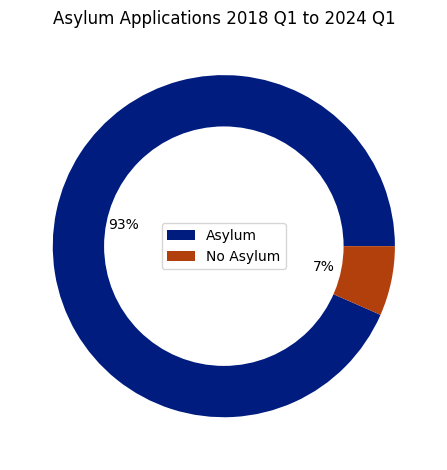

In [952]:
# Draw pie
plt.pie(x = apps['Applications'], autopct='%.0f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title and legend
plt.title("Asylum Applications 2018 Q1 to 2024 Q1")
labels = ['Asylum','No Asylum']
plt.legend(labels = labels, bbox_to_anchor=[0.5, 0.5], loc='center')

# Show
plt.tight_layout()
plt.show()

The vast majority of those arriving by small boat from 2018 Q1 to 2024 Q1 claimed asylum

### How has this changed over time?

In [1001]:
# Group by year and applications
asy_year = ref.groupby(['Year','Asylum application'], as_index = False)['Applications'].sum()

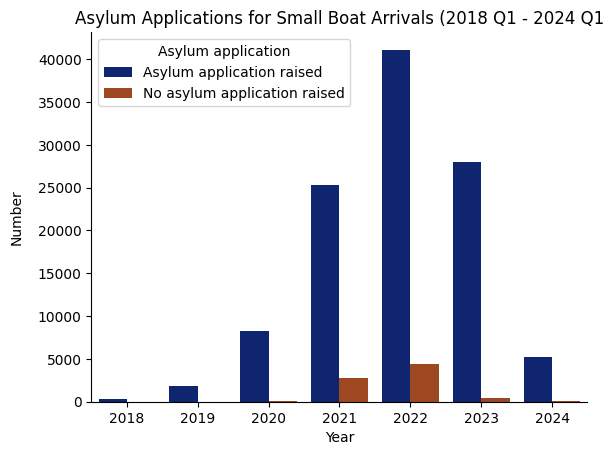

In [996]:
# Plot the claims by year
ax = sns.barplot(data = asy_year,
                 x ='Year',
                 y = 'Applications',
                 hue = 'Asylum application',
                 errorbar = None,
                 palette = 'dark')
plt.title("Asylum Applications for Small Boat Arrivals (2018 Q1 - 2024 Q1")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("Number", labelpad = 10);

In [1018]:
asy_pivot = asy_year.pivot_table(index='Year', columns='Asylum application', values='Applications')
asy_pivot['Total'] = asy_pivot['Asylum application raised'] + asy_pivot['No asylum application raised']
asy_pivot['% raised'] = asy_pivot['Asylum application raised']/asy_pivot['Total']*100
asy_pivot

Asylum application,Asylum application raised,No asylum application raised,Total,% raised
Year,,,,
2018,280,5,285,98.245614
2019,1813,20,1833,98.908893
2020,8279,130,8409,98.454037
2021,25280,2760,28040,90.156919
2022,41108,4363,45471,90.404873
2023,27992,403,28395,98.580736
2024,5206,58,5264,98.898176


Seems to have been fairly consistent over the period with the exception of 2021 and 2022 where the proportion of those arriving by small boat not claiming asylum increased relative to those that did.

We don't need to go through all the other features such as age, sex, nationality etc as we know that the vast majority of arrivals were from small boats and the vast majority of those claim asylum and we have already looked at the other features in relation to method of entry.